# Trabajo Práctico Nº1 : Teoría Moderna y Filtrado Activo
Curso: R4052  
Profesor: Mariano Llamedo Soria  
Ayudante de TPs: David Moharos  
Jefe de TPs: Cesar Fuoco  
Grupo: 3

Integrantes: Rodríguez Silvosa, Martín; Fabi, Juan Sebastián; Casal Bruno, Sebastián;

Autor Alumno particular: Rodríguez Silvosa, Martín

### Objetivos:
Consolidar los conceptos de teoría moderna mediante la implementación circuital.
Simular e implementar el filtro con componentes activos de precisión.
Medir las partes de la función transferencia para frecuencias menores a 100 kHz.

### Descripción:

El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro activo con la siguiente plantilla instructiva:

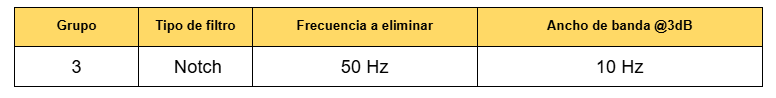

## Parte I : Previo al Laboratorio
### Análisis
1. Obtenga el orden del filtro y $\varepsilon$.
2. Obtenga la función transferencia en el dominio de Laplace. Identifique polos y ceros.
3. Sintetice los valores de los componentes externos del circuito UAF42.

### Simulaciones
1. Realice una simulación numérica/simbólica en Python de la función transferencia.
2. Realice la simulación circuital en LTSpice. Incluya un modelo discreto para simular el UAF42.
3. En ambos casos obtener las gráficas de módulo, fase y retardo y comparar los resultados.


### Armado del circuito
Armar el diseño en un circuito impreso o una placa experimental.
Para el armado tenga en cuenta las siguientes recomendaciones:
- Usar conectores, headers o borneras para poder alimentar el filtro, introducir la señal de entrada, medir la señal de entrada y medir la señal de salida ( test points ).
- Un zócalo DIP14 (de 2x7 pines) para colocar el filtro UAF42 provisto por la Cátedra.
- Incluir resistores variables para realizar el ajuste fino de algún parámetro del diseño.
- En los puntos de alimentación del circuito integrado se recomienda agregar capacitores de bypass. Se sugiere agregar un capacitor electrolítico o de poliéster de 10µF a 68µF con otro cerámico de 100nF a 330nF en paralelo para reducir el ruido de la fuente.

### Parte II : En el Laboratorio
El día de la práctica contarán con el instrumental y los cables de conexión. El setup de medición se detalla a continuación: 

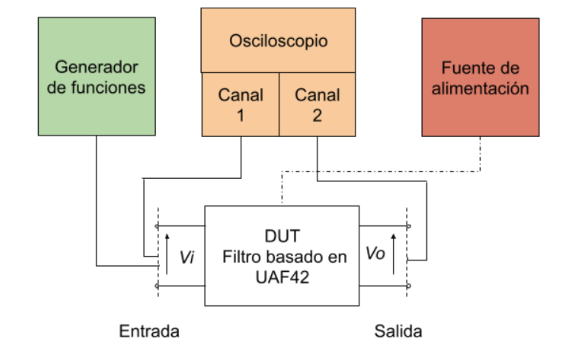

**Pasos a seguir para realizar las mediciones en el laboratorio:**
- 1- Verifique visualmente y con el multímetro que su circuito no tiene cortocircuitos y que los componentes estén correctamente soldados.
- 2- Utilice la limitación de corriente de la fuente en algunas decenas de mA. Para ello se deberán poner en corto los bornes de + y - a una tensión baja por ejemplo 1 V. De esta manera el equipo entra en modo CC ( corto circuito ) y se puede setear el nivel de corriente.
- 3- Calibre la tensión de la fuente. Utilice un multímetro para ajustar la tensión de la fuente. Finalmente alimente su circuito.  Tenga en cuenta que la medición mejora para niveles más altos de fuente.
- 4- Verifique las puntas del osciloscopio. Utilice la señal de prueba tanto en el canal 1 como 2 para ajustar la respuesta temporal visualizada. Verifique el valor de ac y periodo de esta señal de prueba con los medidores del osciloscopio.
- 5- Calibre una señal senoidal en el generador a un nivel que optimice la medición en la banda de paso de valor medio nulo con el generador. Tenga en cuenta que el filtro puede generar sobretensiones a la salida.
- 6- Elija una frecuencia en la mitad de la banda de paso del diseño asignado. Preferiblemente, realice esta calibración con una impedancia de carga del generador de 1 k o más.
- 7- Desenergice el circuito si así estuviera y conecte el integrado. Conecte la alimentación nuevamente y el generador de entrada.
- 8- Verifique con el osciloscopio que tiene señal a la salida. Debe ser de la misma forma que la entrada con una fase y alguna diferencia de amplitud probablemente.
- 9- Realice un barrido en frecuencia sobre su filtro rápido y cualitativo. Verifique que la señal de salida se atenúa cuando barre con frecuencia el filtro.

## Desarrollo
### Parte 1 Análisis (componentes visualizables en el circuito LTSpice):

\begin{equation}
\alpha_{max} = 3dB , \space tomaremos \space \varepsilon = 1
\end{equation}

\begin{equation}
\alpha_{min} = \space ? \space (no \space especifica)
\end{equation}

\begin{equation}
Elegimos \space topología \space multifiltro; \space transformación \space a \space Notch;
\end{equation}

\begin{equation}
Tomaremos \space n = 1 \space por \space duplicación \space del \space orden \space total; 
\end{equation}

\begin{equation}
Bandwith = 10 \space Hz , \space tomaremos \space Q = 5;
\end{equation}

\begin{equation}
$ = {\frac{1}{Q}}{\frac{S}{{S}^2+1}}
\end{equation}

\begin{equation}
T({$}) = \frac{1}{{$}+1}
\end{equation}

\begin{equation}
T({S}) = \frac{S^2 + {wo}^2}{{S^2}+\frac{wo}{Q}S+{wo}^2}
\end{equation}

\begin{equation}
Topología \space multifiltro: \space wo= \frac{1}{RC}
\end{equation}

\begin{equation}
C1=C2=C=100nF
\end{equation}

\begin{equation}
R=\frac{1}{woC} \rightarrow R2=R4=R=32K\ohm
\end{equation}

\begin{equation}
R1=R3=R2Q=160K\ohm
\end{equation}

\begin{equation}
R5=R6=R7=R8=R9=10K\ohm
\end{equation}

##### Topología multifiltro, utilizando hasta la sección de eliminabanda, ejemplo de Schhaumann, "Design of analog filters" pág 380:

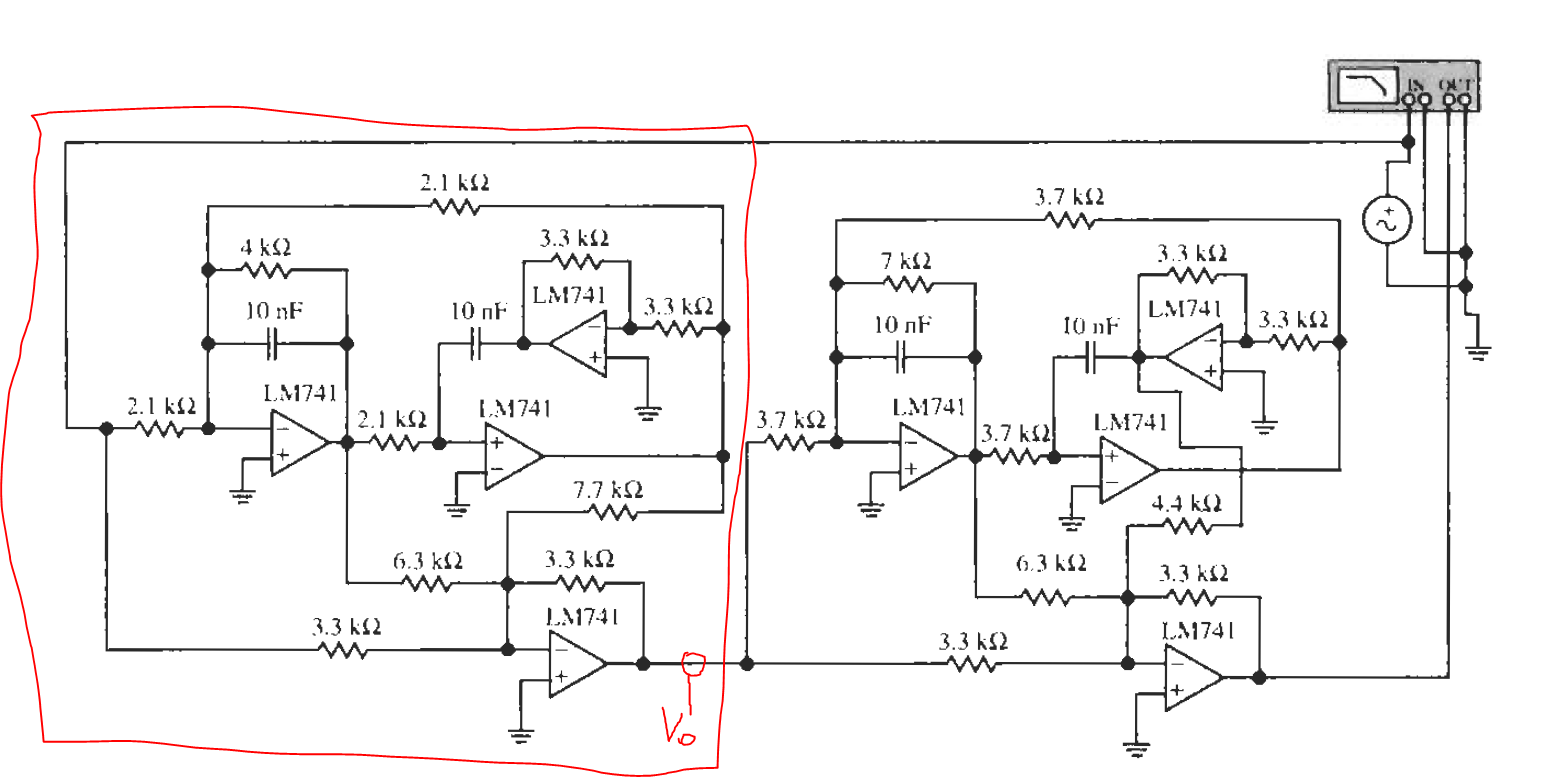

### Simulaciones:

In [3]:
# módulos numéricos y de funciones científicas

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 11

plt.rcParams.update({'font.size':fig_font_size})

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig
from scipy.signal import group_delay

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys
from pytc2.general import print_subtitle

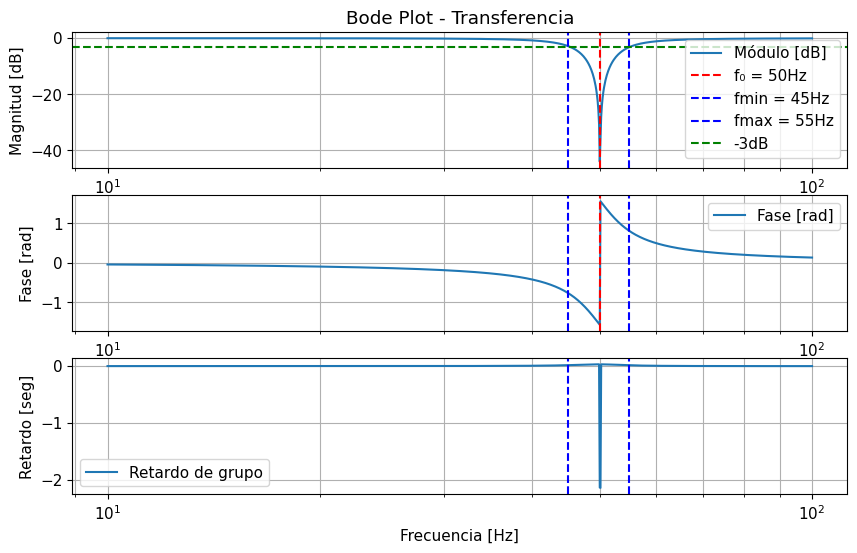

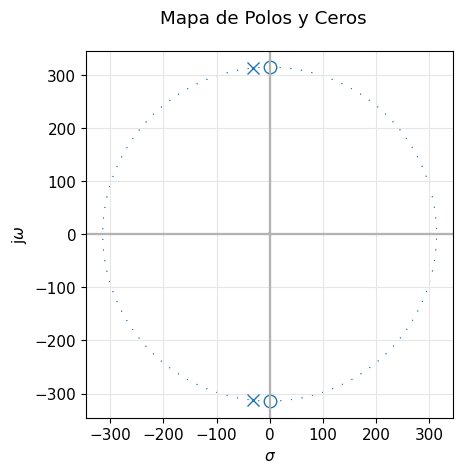

In [24]:
# Definimos los parámetros de la simulación
#################################
fo = 50   # Frecuencia central
BW = 10   # Ancho de banda
Q = 5
w0 = 2*np.pi*fo
C=100e-9
R=1/(w0*C)
######################################################
# Coeficientes de la transferencia
num = [1, 0, w0**2]
den = [1, w0/Q, w0**2]

H = sig.TransferFunction(num, den)

# después lo sobreescribo
w, mag, phase = sig.bode(H)

# Frecuencia personalizada (espaciada logarítimicamente)
f = np.logspace(1, 2, 1000)           # De 10^-1 a 10^2 Hz
w = 2 * np.pi * f                     # En rad/s

# Obtenemos la respuesta en frecuencia
w, mag, phase_deg = sig.bode(H, w)
phase_rad = np.deg2rad(phase_deg)    # Convertimos fase a radianes

# Graficamos
plt.figure(figsize=(10, 6))

# Módulo
plt.subplot(3, 1, 1)
plt.semilogx(f, mag, label='Módulo [dB]')
plt.axvline(x=fo, color='r', linestyle='--', label='f₀ = 50Hz')
plt.axvline(x=fo-5, color='b', linestyle='--', label='fmin = 45Hz')
plt.axvline(x=fo+5, color='b', linestyle='--', label='fmax = 55Hz')
plt.axhline(y=-3, color='g', linestyle='--', label='-3dB')
plt.title('Bode Plot - Transferencia')
plt.ylabel('Magnitud [dB]')
#plt.ylim([-60, 10])
#plt.xlim([1e1, 1e2])
plt.grid(True, which='both')
plt.legend()

# Fase
plt.subplot(3, 1, 2)
plt.semilogx(f, phase_rad, label='Fase [rad]')
plt.axvline(x=fo, color='r', linestyle='--')
plt.axvline(x=fo-5, color='b', linestyle='--')
plt.axvline(x=fo+5, color='b', linestyle='--')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
#plt.ylim([-2, 2])
#plt.xlim([1e1, 1e2])
plt.grid(True, which='both')
plt.legend()

# Retardo de Grupo
# w, gd = group_delay((num, den), w=2*np.pi*f)  # devuelve frecuencia en rad/s y retardo [s]
# Retardo de grupo por derivada numérica
dphi = np.gradient(phase_rad, w)      # d(phi)/dw
gd = -dphi                            # -d(phi)/dw

plt.subplot(3, 1, 3)
plt.semilogx(f, gd, linestyle="-", label="Retardo de grupo")
#plt.title("Retardo de grupo")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Retardo [seg]")
#plt.xlim([1e1, 1e2])
#plt.ylim([-2, 1])
plt.axvline(x=fo-5, color='b', linestyle='--')
plt.axvline(x=fo+5, color='b', linestyle='--')
plt.grid(True, which="both")
plt.legend()

# Diagrama de polos y ceros
pzmap(H)

plt.tight_layout()
plt.show()

### Las simulaciones cumplen con la plantilla especificada (BW 10Hz, Fo 50Hz)

## LTSpice, circuito ensayado y verificación de transferencia:

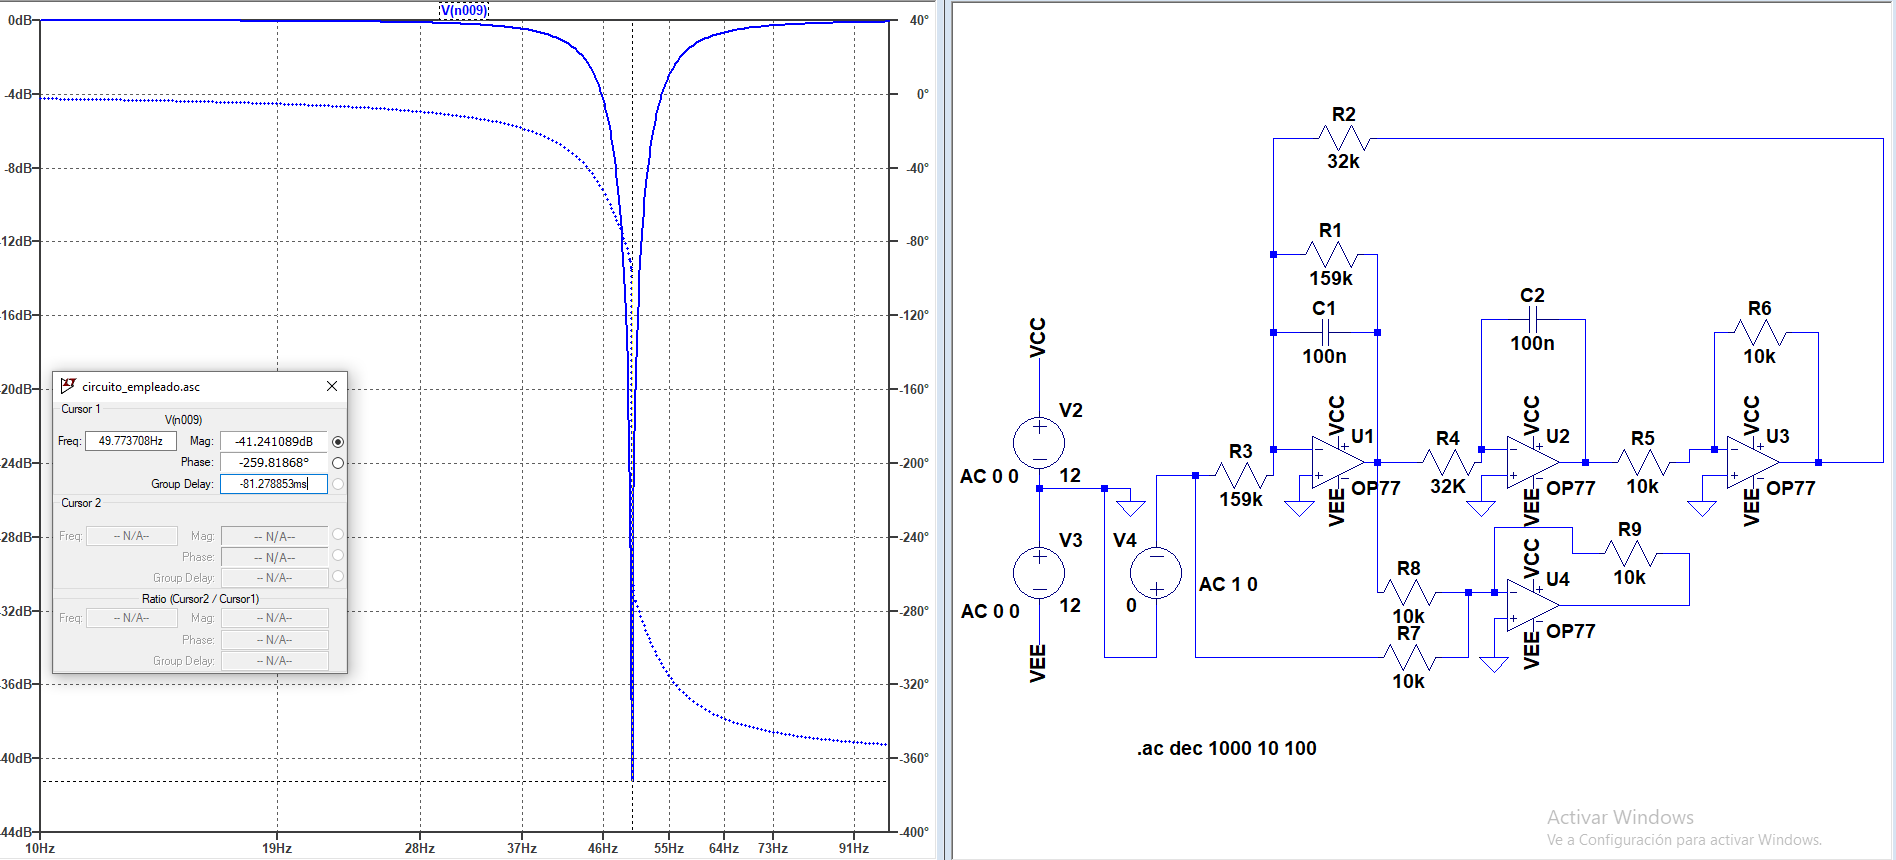

#### El circuito en LTSpice también cumple con los parámetros esperables

## Instrumentos utilizados:


- Multímetro PROSKIT MT-1217.
- Osciloscopio UNI-T GEO21L053.
- Fuente de alimentación EMakers VA150509274 y VA150509068.
- Analizador de audio Agilent U8903A.
- Generador de señales S/N 16G1051212063.


## Componentes utilizados:

- Placa universal 10x10 cm
- Operacional TL082
- Capacitor de poliéster 100nF
- Capacitor de tantalio 22uF de 25V
- Capacitor cerámico 100nF
- Resistor 10 kΩ 1/4 Watt al 1%
- Resistor 150 kΩ 1/4 Watt al 1%
- Resistor 32 kΩ 1/4 Watt al 1%


#### Características eléctricas TL082, extracto de datasheet Texas Instrument (características suficientes para nuestra aplicación):
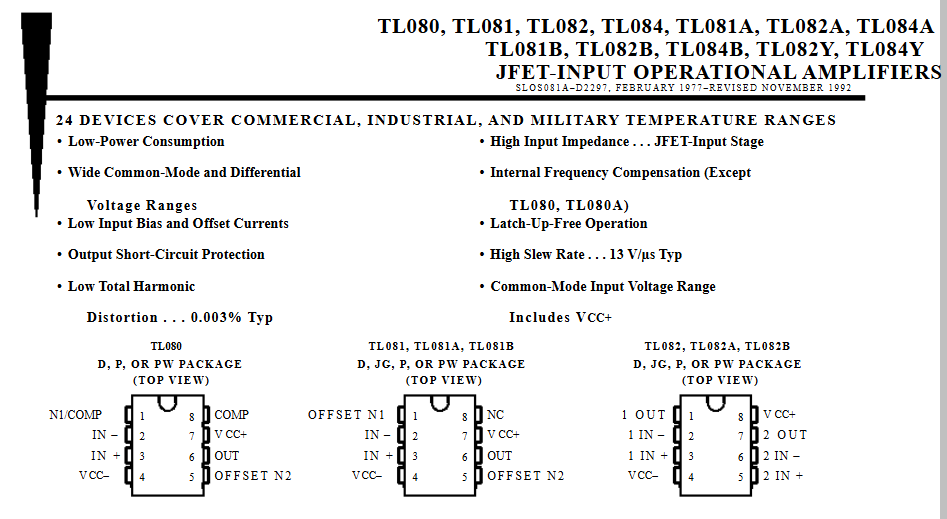
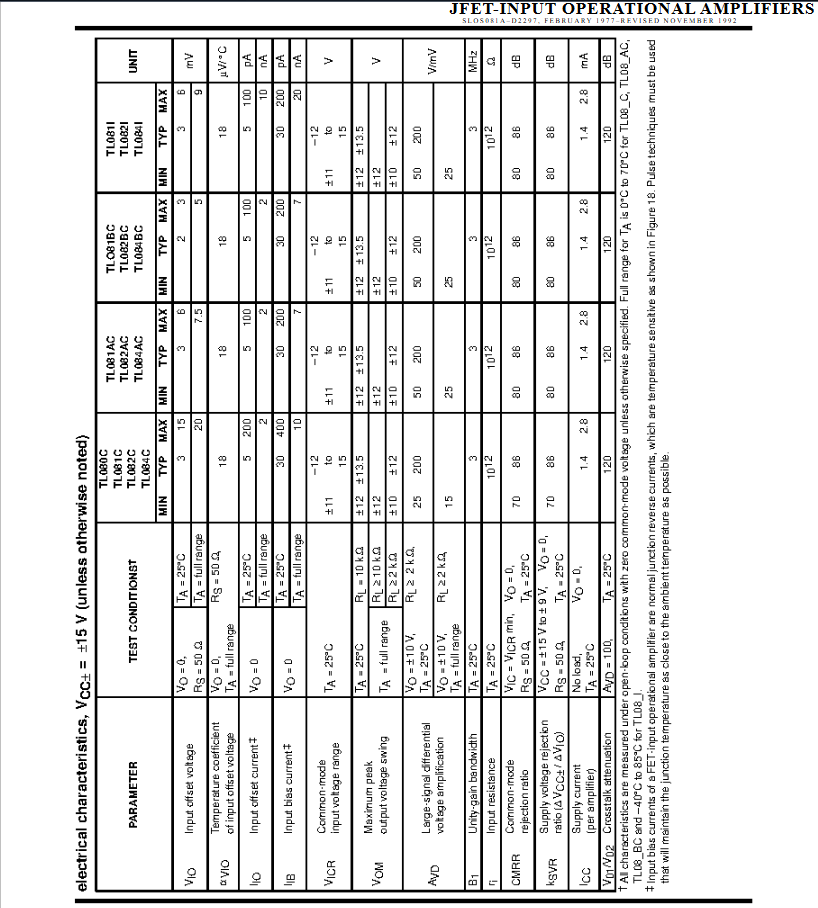

#### Placa utilizada utilizando todas las consideraciones listadas:

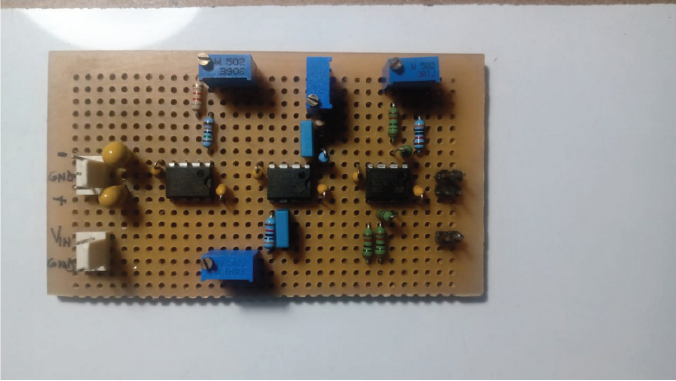

### Mediciones en laboratorio
Se obtuvo la siguiente tabla de resultados:

In [25]:
import pandas as pd
pd.set_option("display.max_rows", None)   # muestra todas las filas

data = [
    [1, 5, 4.07, 4.07, 560, 1.00000, 0.00000],
    [2, 10, 4.07, 4.07, 680, 1.00000, 0.00000],
    [3, 15, 4.07, 4.07, 700, 1.00000, 0.00000],
    [4, 20, 4.07, 4.07, 720, 1.00000, 0.00000],
    [5, 25, 4.07, 4.03, 850, 0.99017, -0.08579],
    [6, 30, 4.07, 4.00, 990, 0.98280, -0.15069],
    [7, 35, 4.07, 3.92, 1270, 0.96314, -0.32617],
    [8, 40, 4.07, 3.72, 1720, 0.91400, -0.78103],
    [9, 41, 4.07, 3.64, 1840, 0.89435, -0.96986],
    [10, 42, 4.07, 3.55, 2020, 0.87224, -1.18732],
    [11, 43, 4.07, 3.40, 2240, 0.83538, -1.56231],
    [12, 44, 4.07, 3.20, 2500, 0.78624, -2.08889],
    [13, 45, 4.07, 2.96, 2720, 0.72727, -2.76605],
    [14, 46, 4.07, 2.64, 3040, 0.64865, -3.75981],
    [15, 47, 4.07, 2.20, 3440, 0.54054, -5.34343],
    [16, 48, 4.07, 1.60, 3960, 0.39312, -8.10949],
    [17, 49, 4.07, 0.96, 4520, 0.23587, -12.54646],
    [18, 50, 4.07, 0.18, 5160, 0.04423, -27.08644],
    [19, 51, 4.07, 0.68, -4200, 0.16708, -15.54171],
    [20, 52, 4.07, 1.36, -3660, 0.33415, -9.52111],
    [21, 53, 4.07, 1.91, -3240, 0.46929, -6.57122],
    [22, 54, 4.07, 2.35, -2800, 0.57740, -4.77053],
    [23, 55, 4.07, 2.70, -2420, 0.66339, -3.56461],
    [24, 56, 4.07, 2.96, -2140, 0.72727, -2.76605],
    [25, 57, 4.07, 3.16, -1880, 0.77641, -2.19815],
    [26, 58, 4.07, 3.27, -1720, 0.80344, -1.90093],
    [27, 59, 4.07, 3.44, -1520, 0.84521, -1.46072],
    [28, 60, 4.07, 3.50, -1360, 0.85995, -1.31053],
    [29, 65, 4.07, 3.75, -880, 0.92138, -0.71126],
    [30, 70, 4.07, 3.85, -680, 0.94595, -0.48267],
    [31, 75, 4.07, 3.92, -510, 0.96314, -0.32617],
    [32, 80, 4.07, 3.96, -420, 0.97297, -0.23798],
    [33, 85, 4.07, 3.96, -340, 0.97297, -0.23798],
    [34, 90, 4.07, 4.00, -290, 0.98280, -0.15069],
    [35, 95, 4.07, 4.00, -260, 0.98280, -0.15069],
    [36, 100, 4.07, 4.03, -220, 0.99017, -0.08579],
]

columns = [
    "Muestra N°",
    "Frecuencia [Hz]",
    "V_entrada [Vpp]",
    "V_salida [Vpp]",
    "Desfasaje [us]",
    "Atenuación [Veces]",
    "Atenuación [dB]"
]

df = pd.DataFrame(data, columns=columns)
df.head(36)

,Muestra N°,Frecuencia [Hz],V_entrada [Vpp],V_salida [Vpp],Desfasaje [us],Atenuación [Veces],Atenuación [dB]
0,1,5,4.07,4.07,560,1.00000,0.00000
1,2,10,4.07,4.07,680,1.00000,0.00000
2,3,15,4.07,4.07,700,1.00000,0.00000
3,4,20,4.07,4.07,720,1.00000,0.00000
4,5,25,4.07,4.03,850,0.99017,-0.08579
5,6,30,4.07,4.00,990,0.98280,-0.15069
6,7,35,4.07,3.92,1270,0.96314,-0.32617
7,8,40,4.07,3.72,1720,0.91400,-0.78103
8,9,41,4.07,3.64,1840,0.89435,-0.96986
9,10,42,4.07,3.55,2020,0.87224,-1.18732


### Tabla grupal hecha en excel para más prolijidad:

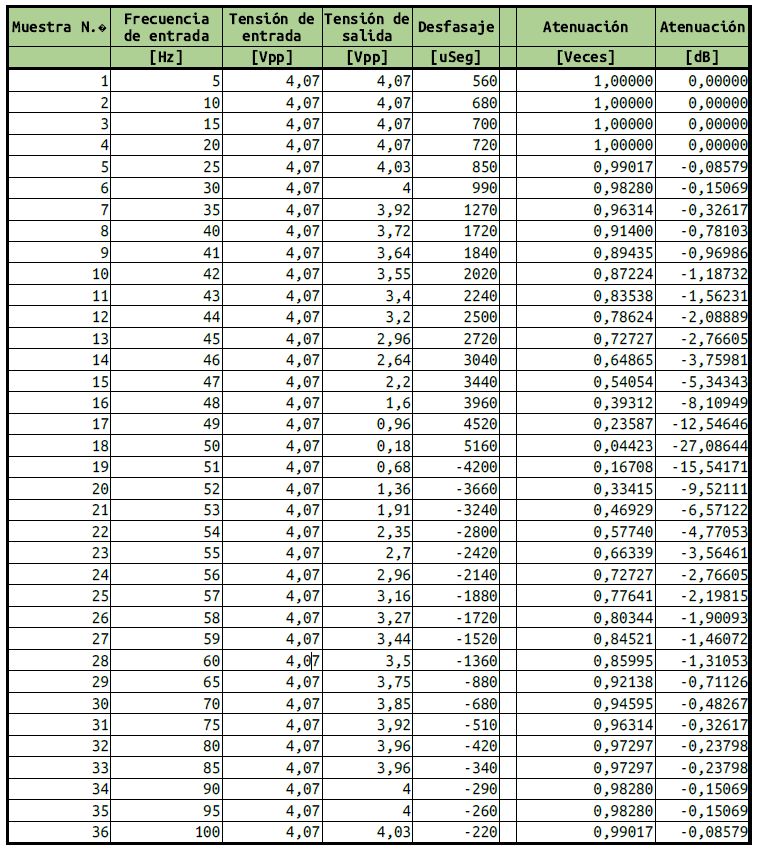

#### Transferencia resultante práctica:

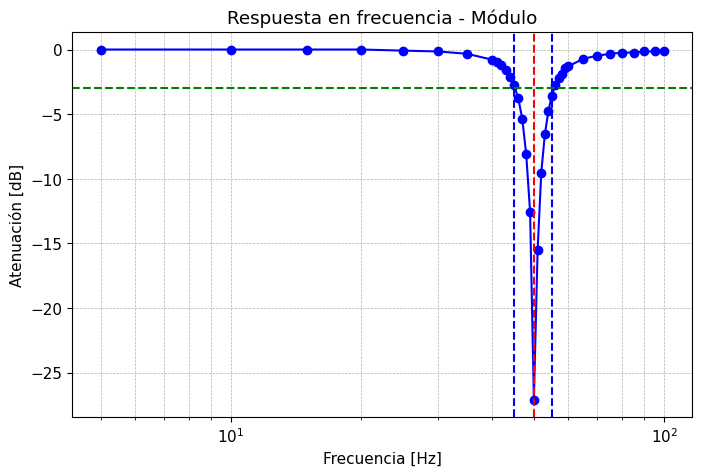

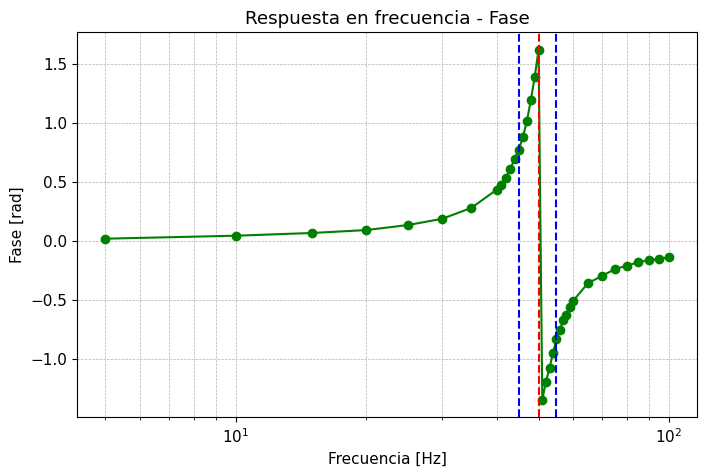

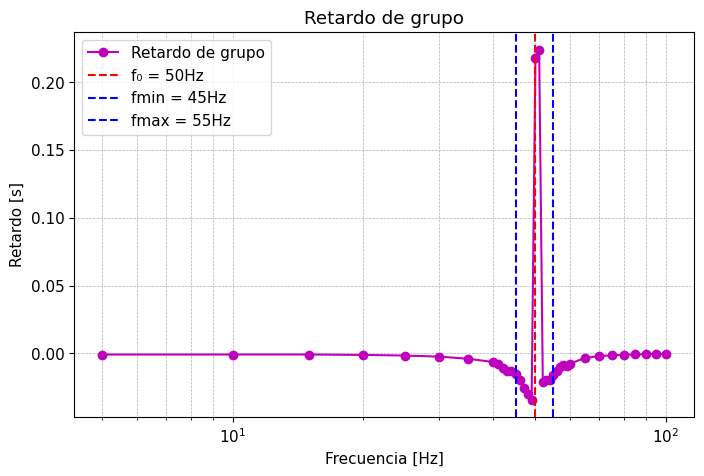

In [27]:
# --- Módulo en dB ---
plt.figure(figsize=(8,5))
plt.semilogx(df["Frecuencia [Hz]"], df["Atenuación [dB]"], marker="o", linestyle="-", color="b")
plt.title("Respuesta en frecuencia - Módulo")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Atenuación [dB]")
plt.axvline(x=fo, color='r', linestyle='--', label='f₀ = 50Hz')
plt.axvline(x=fo-5, color='b', linestyle='--', label='fmin = 45Hz')
plt.axvline(x=fo+5, color='b', linestyle='--', label='fmax = 55Hz')
plt.axhline(y=-3, color='g', linestyle='--', label='-3dB')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

# --- Fase ---
# Convertimos el desfasaje en [us] a [rad] usando: fase = 2π f Δt
fase_rad = 2 * np.pi * df["Frecuencia [Hz]"] * (df["Desfasaje [us]"] * 1e-6)

plt.figure(figsize=(8,5))
plt.semilogx(df["Frecuencia [Hz]"], fase_rad, marker="o", linestyle="-", color="g")
plt.title("Respuesta en frecuencia - Fase")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [rad]")
plt.axvline(x=fo, color='r', linestyle='--', label='f₀ = 50Hz')
plt.axvline(x=fo-5, color='b', linestyle='--', label='fmin = 45Hz')
plt.axvline(x=fo+5, color='b', linestyle='--', label='fmax = 55Hz')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

# --- Retardo de grupo ---
# convertir desfasaje en segundos
dt = df["Desfasaje [us]"] * 1e-6   # [s]

# alcular fase en radianes
fase_rad = 2 * np.pi * df["Frecuencia [Hz]"] * dt

# derivar fase respecto a omega
w = 2 * np.pi * df["Frecuencia [Hz]"]   # rad/s
dphi = np.gradient(fase_rad, w)        # d(phi)/dw
gd = -dphi                             # [s] retardo de grupo

# --- Gráfico ---
plt.figure(figsize=(8,5))
plt.semilogx(df["Frecuencia [Hz]"], gd, marker="o", linestyle="-", color="m", label="Retardo de grupo")
plt.title("Retardo de grupo")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Retardo [s]")
plt.axvline(x=fo, color='r', linestyle='--', label='f₀ = 50Hz')
plt.axvline(x=fo-5, color='b', linestyle='--', label='fmin = 45Hz')
plt.axvline(x=fo+5, color='b', linestyle='--', label='fmax = 55Hz')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.show()

#### Los valores ensayados son muy parecidos a los simulados excepto por el retardo de grupo, aunque tiene la misma tendencia

#### Ensayo analizador de audio:

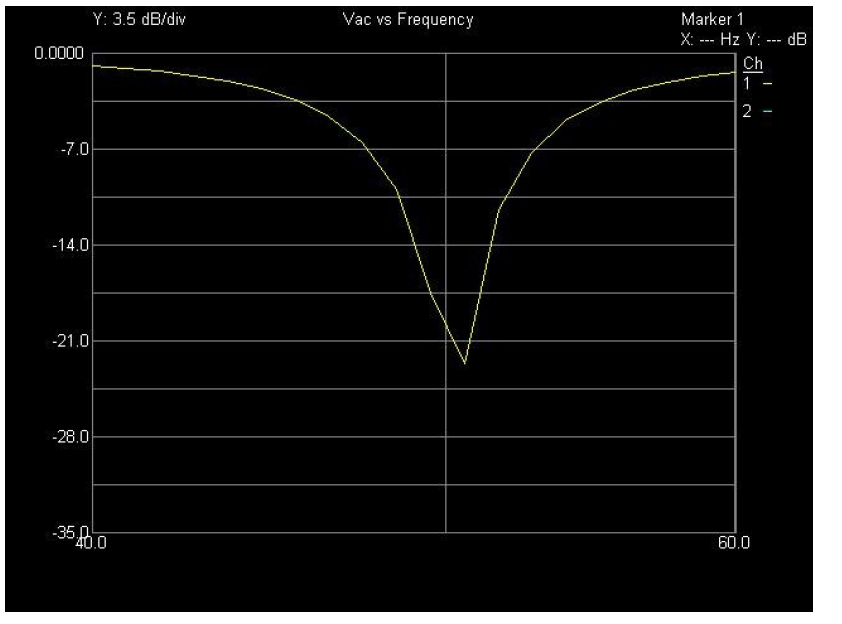

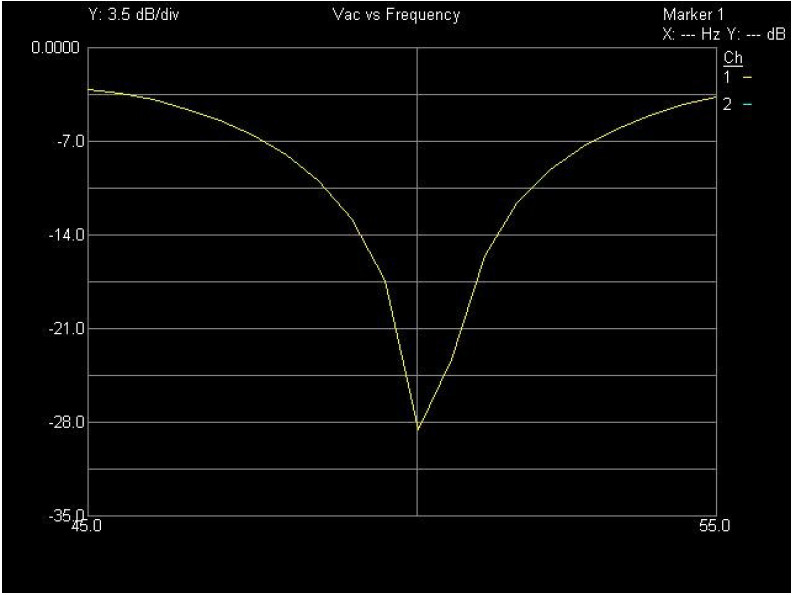

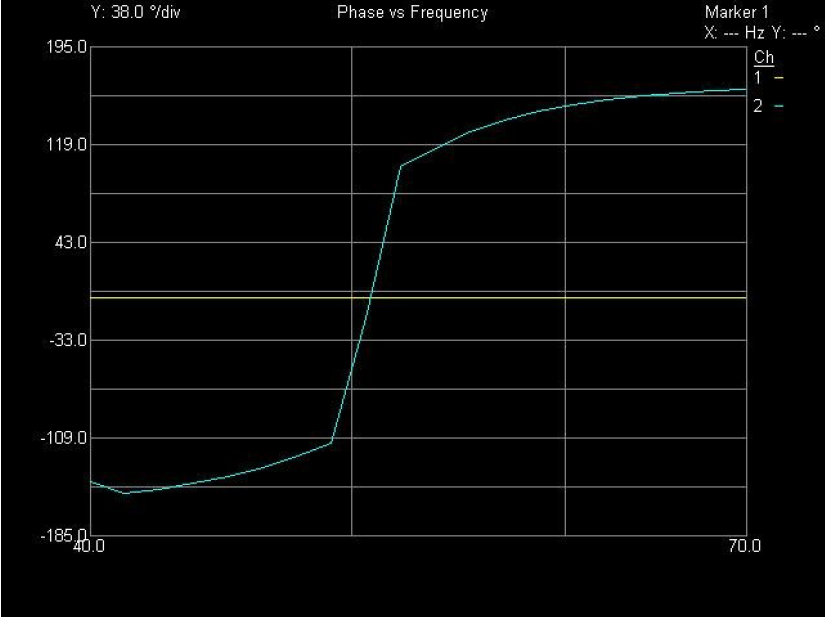

#### El analizador de audio verifica la toma de valores efectuada en el laboratorio con un margen de error aceptable

## Conclusiones
- El circuito cumple con las especificaciones dadas con un error en atenuación de 3 dB corrido a 3.5 dB que cae dentro de los parámetros aceptables.
- Los errores pueden deberse a las características eléctricas del amplificador, tolerancias en capacitores y resistencias que no tomamos en cuenta pero sabemos que existen y pueden mover el punto de trabajo del filtro.
- El analizador de audio muestra una transferencia muy similar a la calculada y simulada, corroborando el resultado con el análisis hecho. Las diferencias se pueden deber al muestreo a la hora de realizar el análisis con una cantidad de puntos inferior a de la tabla.
- El diseño Ackerberg-Mossberg lo descartamos al principio por problemas de ajuste y ruido en la placa final, quedándonos con el diseño actual tomado de la topología multifiltro.